## Clustering different Boston communities based on 311 requests

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/Users/timli/Dropbox/Boston 311 Requests/clean_311_service_requests_2019_to_2015.csv")

<b>TODO: arround one sixth of rows do not have a specific zip code because the location was given as an intersection between two street. I need to revisit and solve this issue. I proceeded ignoring this issue for now. </b>

Remove data rows with empty location_zipcode

In [6]:
location_zipcode_nan = df[df['location_zipcode'].isnull()]
location_zipcode_nan

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,case_title,subject,reason,type,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
1,101002767857,2019-01-01 00:08:52,2019-01-03 08:30:00,2019-01-02 02:22:11,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,D14,Allston / Brighton,15,22,2209,INTERSECTION Eastburn St & Mount Vernon St,NaN,42.3594,-71.0587,Citizens Connect App
11,101002767872,2019-01-01 04:32:55,2019-01-03 08:30:00,2019-01-02 02:21:50,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,D4,Back Bay,14,4,0405,INTERSECTION Albemarle St & Albemarle Ct,NaN,42.3594,-71.0587,Citizens Connect App
14,101002767875,2019-01-01 05:17:00,NaN,2019-11-24 13:48:34,1,Closed,Fire Hydrant,Boston Water & Sewer Commission,Fire Hydrant,Fire Hydrant,...,A1,Back Bay,14,5,0505,INTERSECTION Beaver St & Beacon St,NaN,42.3594,-71.0587,Constituent Call
38,101002767900,2019-01-01 08:47:31,2019-01-04 08:30:00,2019-01-01 09:32:37,1,Closed,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,Improper Storage of Trash (Barrels),...,D4,Back Bay,14,5,0509,INTERSECTION Public Alley No. 427 & Public All...,NaN,42.3594,-71.0587,Citizens Connect App
39,101002767901,2019-01-01 08:49:15,2019-03-08 08:30:00,2019-03-21 11:08:21,0,Closed,Graffiti Removal,Property Management,Graffiti,Graffiti Removal,...,D4,South End,6,5,0501,INTERSECTION Chandler St & Berkeley St,NaN,42.3594,-71.0587,Citizens Connect App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200796,101001685658,2015-12-31 20:45:00,2016-01-05 08:30:00,2015-12-31 22:48:08,1,Closed,Empty Litter Basket,Public Works Department,Highway Maintenance,Empty Litter Basket,...,A1,Downtown / Financial District,4,Ward 3,0308,INTERSECTION Washington St & Temple Pl,NaN,42.3548,-71.0612,Constituent Call
1200797,101001685659,2015-12-31 20:59:00,2016-01-19 08:30:00,2016-01-05 11:11:38,1,Closed,Street Light Outages///Issued to Maverick.,Public Works Department,Street Lights,Street Light Outages,...,E13,Jamaica Plain,10,Ward 19,1912,INTERSECTION Catherine St & Meyer St,NaN,42.2886,-71.1149,Citizens Connect App
1200798,101001685660,2015-12-31 21:21:33,2016-01-05 08:30:00,2015-12-31 21:42:45,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,C6,South Boston / South Boston Waterfront,5,Ward 6,0604,INTERSECTION Bolton St & Dorchester St,NaN,42.3364,-71.0443,Citizens Connect App
1200800,101001685662,2015-12-31 21:56:36,2016-01-05 08:30:00,2015-12-31 22:09:14,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,C6,South Boston / South Boston Waterfront,5,Ward 7,0705,INTERSECTION F St & W Seventh St,NaN,42.3343,-71.0508,Citizens Connect App


In [7]:
zipcode_notnull_df = df[df['location_zipcode'].notnull()]
zipcode_notnull_df

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,case_title,subject,reason,type,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101002767856,2019-01-01 00:04:32,2019-01-03 08:30:00,2019-01-02 02:22:29,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,B3,Dorchester,9,Ward 17,1701,6-8 School St,2124.0,42.2965,-71.0729,Citizens Connect App
2,101002767859,2019-01-01 00:50:00,NaN,2019-11-23 11:36:05,1,Closed,Catchbasin,Boston Water & Sewer Commission,Catchbasin,Catchbasin,...,E13,Jamaica Plain,11,11,1110,195 South St,2130.0,42.3594,-71.0587,Constituent Call
3,101002767861,2019-01-01 01:26:00,NaN,2019-05-17 12:27:07,1,Closed,Fire,Mayor's 24 Hour Hotline,Notification,Notification,...,C11,Dorchester,8,Ward 15,1507,34 Ridgewood St,2122.0,42.3022,-71.0661,Constituent Call
4,101002767862,2019-01-01 01:33:09,2019-01-03 08:30:00,2019-01-02 02:28:35,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,B3,Dorchester,9,Ward 17,1701,3 School St,2124.0,42.2968,-71.0727,Citizens Connect App
5,101002767863,2019-01-01 01:56:00,2019-01-03 08:30:00,2019-01-02 02:20:25,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,C6,South Boston / South Boston Waterfront,5,Ward 7,0706,22 Ward St,2127.0,42.3298,-71.0546,Citizens Connect App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200799,101001685661,2015-12-31 21:23:15,2016-01-05 08:30:00,2015-12-31 21:42:23,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,C6,South Boston / South Boston Waterfront,5,Ward 6,0604,324 W Third St,2127.0,42.3368,-71.0454,Citizens Connect App
1200802,101001685664,2015-12-31 23:00:19,2016-01-05 08:30:00,2016-01-02 07:11:49,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,C6,South Boston / South Boston Waterfront,5,Ward 7,0705,212 W Seventh St,2127.0,42.3341,-71.0502,Citizens Connect App
1200803,101001685666,2015-12-31 23:10:09,NaN,2016-01-05 16:32:02,1,Closed,Schedule Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup SS,...,D4,Roxbury,13,Ward 9,0903,483 Massachusetts Ave,2118.0,42.3395,-71.0809,Self Service
1200804,101001685667,2015-12-31 23:12:30,2016-01-05 08:30:00,2016-01-02 10:18:59,1,Closed,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,...,A1,Boston,14,05,0503,115 Boylston St,2108.0,42.3529,-71.0654,Citizens Connect App


Find the reasons of complaints that have total occurrences of more than ten thousand, and there are 16 of them

In [8]:
frequent_reasons = zipcode_notnull_df['reason'].value_counts()[:16].index.tolist()

In [9]:
most_frequent_df = zipcode_notnull_df[zipcode_notnull_df['reason'].isin(frequent_reasons)]

Do pivot tables on reasons of complaints for each zipcode

In [10]:
zipcode_reason_df = most_frequent_df[['location_zipcode','reason']]
zipcode_reason_df

,location_zipcode,reason
0,2124.0,Enforcement & Abandoned Vehicles
4,2124.0,Enforcement & Abandoned Vehicles
5,2127.0,Enforcement & Abandoned Vehicles
6,2130.0,Enforcement & Abandoned Vehicles
7,2130.0,Enforcement & Abandoned Vehicles
...,...,...
1200799,2127.0,Enforcement & Abandoned Vehicles
1200802,2127.0,Enforcement & Abandoned Vehicles
1200803,2118.0,Sanitation
1200804,2108.0,Enforcement & Abandoned Vehicles


In [11]:
zipcode_reason_df = pd.DataFrame({'count' : zipcode_reason_df.groupby(['location_zipcode','reason']).size()}).reset_index()
zipcode_reason_df

,location_zipcode,reason,count
0,2108.0,Animal Issues,201
1,2108.0,Building,1098
2,2108.0,Code Enforcement,2041
3,2108.0,Enforcement & Abandoned Vehicles,2071
4,2108.0,Environmental Services,288
...,...,...,...
502,2467.0,Sanitation,250
503,2467.0,Signs & Signals,7
504,2467.0,Street Cleaning,66
505,2467.0,Street Lights,23


In [12]:
zipcode_reason_df = zipcode_reason_df.pivot(index='location_zipcode', columns='reason', values='count')

In [13]:
zipcode_reason_df = zipcode_reason_df.fillna(0)

In [14]:
zipcode_reason_df

reason,Animal Issues,Building,Code Enforcement,Enforcement & Abandoned Vehicles,Environmental Services,Graffiti,Highway Maintenance,Housing,Needle Program,Park Maintenance & Safety,Recycling,Sanitation,Signs & Signals,Street Cleaning,Street Lights,Trees
location_zipcode,,,,,,,,,,,,,,,,
2108.0,201.0,1098.0,2041.0,2071.0,288.0,161.0,2264.0,180.0,172.0,842.0,260.0,1329.0,604.0,3158.0,1773.0,543.0
2109.0,80.0,610.0,1309.0,1214.0,97.0,213.0,1257.0,142.0,97.0,206.0,30.0,579.0,206.0,1831.0,468.0,205.0
2110.0,119.0,607.0,282.0,663.0,47.0,105.0,743.0,37.0,89.0,169.0,12.0,195.0,255.0,337.0,324.0,52.0
2111.0,86.0,794.0,1295.0,2795.0,213.0,1382.0,1502.0,172.0,284.0,104.0,43.0,555.0,323.0,1633.0,573.0,149.0
2113.0,86.0,728.0,4328.0,2883.0,457.0,462.0,1696.0,278.0,159.0,569.0,95.0,1847.0,333.0,6012.0,562.0,146.0
2114.0,221.0,1335.0,5409.0,2243.0,409.0,269.0,3386.0,564.0,135.0,289.0,122.0,2663.0,366.0,8394.0,1908.0,923.0
2115.0,208.0,1347.0,2353.0,2953.0,439.0,1099.0,3946.0,935.0,560.0,248.0,239.0,1677.0,599.0,3053.0,1108.0,1057.0
2116.0,281.0,2923.0,6379.0,5665.0,709.0,1890.0,5482.0,600.0,505.0,628.0,409.0,3420.0,777.0,7624.0,2399.0,1956.0
2118.0,429.0,2677.0,6936.0,6876.0,947.0,933.0,5180.0,1402.0,5615.0,1905.0,466.0,4741.0,801.0,9431.0,1346.0,2525.0


In [15]:
zipcode_reason_df.dtypes

reason
Animal Issues                       float64
Building                            float64
Code Enforcement                    float64
Enforcement & Abandoned Vehicles    float64
Environmental Services              float64
Graffiti                            float64
Highway Maintenance                 float64
Housing                             float64
Needle Program                      float64
Park Maintenance & Safety           float64
Recycling                           float64
Sanitation                          float64
Signs & Signals                     float64
Street Cleaning                     float64
Street Lights                       float64
Trees                               float64
dtype: object

<b> do not consider those with very few requests </b>

In [16]:
zipcode_reason_df = zipcode_reason_df[zipcode_reason_df['Animal Issues']>20.0]

In [17]:
zipcode_reason_df['sum'] = zipcode_reason_df.sum(axis=1)

<ipython-input-17-6eef087d40fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_reason_df['sum'] = zipcode_reason_df.sum(axis=1)


In [18]:
df_new = zipcode_reason_df.loc[:,"Animal Issues":"Trees"].div(zipcode_reason_df["sum"], axis=0)
df_new

reason,Animal Issues,Building,Code Enforcement,Enforcement & Abandoned Vehicles,Environmental Services,Graffiti,Highway Maintenance,Housing,Needle Program,Park Maintenance & Safety,Recycling,Sanitation,Signs & Signals,Street Cleaning,Street Lights,Trees
location_zipcode,,,,,,,,,,,,,,,,
2108.0,0.011834,0.064645,0.120165,0.121931,0.016956,0.009479,0.133294,0.010598,0.010127,0.049573,0.015308,0.078246,0.035561,0.185929,0.104386,0.031969
2109.0,0.009363,0.071395,0.153207,0.142088,0.011353,0.024930,0.147121,0.016620,0.011353,0.024110,0.003511,0.067767,0.024110,0.214302,0.054775,0.023993
2110.0,0.029485,0.150396,0.069871,0.164272,0.011645,0.026016,0.184093,0.009167,0.022052,0.041873,0.002973,0.048315,0.063181,0.083499,0.080278,0.012884
2111.0,0.007225,0.066706,0.108796,0.234815,0.017895,0.116105,0.126187,0.014450,0.023860,0.008737,0.003613,0.046627,0.027136,0.137192,0.048139,0.012518
2113.0,0.004166,0.035270,0.209680,0.139673,0.022140,0.022383,0.082167,0.013468,0.007703,0.027566,0.004602,0.089482,0.016133,0.291265,0.027227,0.007073
2114.0,0.007718,0.046620,0.188888,0.078328,0.014283,0.009394,0.118243,0.019695,0.004714,0.010092,0.004260,0.092995,0.012781,0.293128,0.066629,0.032232
2115.0,0.009532,0.061730,0.107832,0.135328,0.020118,0.050364,0.180835,0.042849,0.025663,0.011365,0.010953,0.076853,0.027451,0.139911,0.050777,0.048440
2116.0,0.006747,0.070185,0.153168,0.136024,0.017024,0.045381,0.131630,0.014407,0.012126,0.015079,0.009821,0.082119,0.018657,0.183062,0.057603,0.046966
2118.0,0.008217,0.051274,0.132848,0.131699,0.018138,0.017870,0.099215,0.026853,0.107546,0.036487,0.008925,0.090806,0.015342,0.180636,0.025781,0.048362


## Conduct k-means clustering

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
from sklearn.decomposition import PCA

In [21]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

<b>Pick the number of appropriate clusters</b>

In [22]:
sum_of_squared_distances = []
Ks = range(2,15)
for k in Ks:
    km = KMeans(n_clusters=k).fit(df_new)
    sum_of_squared_distances.append(km.inertia_)

In [ ]:
# kmeans = KMeans(n_clusters=3).fit(df_new)
# centroids = kmeans.cluster_centers_
# print(centroids)

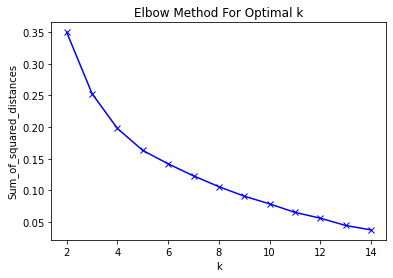

In [26]:
plt.plot(Ks, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Elbow chart above, it is decided that the appropriate number of clusters to use is 5.

<b> Map out the zip code areas within each of the five clusters <b>

In [41]:
kmeans = KMeans(n_clusters=5, random_state=72).fit_predict(df_new)
# random state for centroid initialization set to 72 means randomness is now deterministic
print(kmeans)

[2 2 2 2 3 3 2 2 2 0 0 1 0 1 0 1 4 2 0 0 1 1 0 0 1 4 2]


<b> Patterns of 311 activity within clusters </b>

In [65]:
df_new["cluster"] = kmeans

In [69]:
df_new

reason,Animal Issues,Building,Code Enforcement,Enforcement & Abandoned Vehicles,Environmental Services,Graffiti,Highway Maintenance,Housing,Needle Program,Park Maintenance & Safety,Recycling,Sanitation,Signs & Signals,Street Cleaning,Street Lights,Trees,cluster
location_zipcode,,,,,,,,,,,,,,,,,
2108.0,0.011834,0.064645,0.120165,0.121931,0.016956,0.009479,0.133294,0.010598,0.010127,0.049573,0.015308,0.078246,0.035561,0.185929,0.104386,0.031969,2
2109.0,0.009363,0.071395,0.153207,0.142088,0.011353,0.024930,0.147121,0.016620,0.011353,0.024110,0.003511,0.067767,0.024110,0.214302,0.054775,0.023993,2
2110.0,0.029485,0.150396,0.069871,0.164272,0.011645,0.026016,0.184093,0.009167,0.022052,0.041873,0.002973,0.048315,0.063181,0.083499,0.080278,0.012884,2
2111.0,0.007225,0.066706,0.108796,0.234815,0.017895,0.116105,0.126187,0.014450,0.023860,0.008737,0.003613,0.046627,0.027136,0.137192,0.048139,0.012518,2
2113.0,0.004166,0.035270,0.209680,0.139673,0.022140,0.022383,0.082167,0.013468,0.007703,0.027566,0.004602,0.089482,0.016133,0.291265,0.027227,0.007073,3
2114.0,0.007718,0.046620,0.188888,0.078328,0.014283,0.009394,0.118243,0.019695,0.004714,0.010092,0.004260,0.092995,0.012781,0.293128,0.066629,0.032232,3
2115.0,0.009532,0.061730,0.107832,0.135328,0.020118,0.050364,0.180835,0.042849,0.025663,0.011365,0.010953,0.076853,0.027451,0.139911,0.050777,0.048440,2
2116.0,0.006747,0.070185,0.153168,0.136024,0.017024,0.045381,0.131630,0.014407,0.012126,0.015079,0.009821,0.082119,0.018657,0.183062,0.057603,0.046966,2
2118.0,0.008217,0.051274,0.132848,0.131699,0.018138,0.017870,0.099215,0.026853,0.107546,0.036487,0.008925,0.090806,0.015342,0.180636,0.025781,0.048362,2


<b> TODO: not sure whether mean is the correct way </b>

In [70]:
df_cluster = df_new.groupby(['cluster']).mean()

In [72]:
df_cluster

reason,Animal Issues,Building,Code Enforcement,Enforcement & Abandoned Vehicles,Environmental Services,Graffiti,Highway Maintenance,Housing,Needle Program,Park Maintenance & Safety,Recycling,Sanitation,Signs & Signals,Street Cleaning,Street Lights,Trees
cluster,,,,,,,,,,,,,,,,
0,0.015914,0.049636,0.096387,0.148236,0.023092,0.018515,0.093326,0.048845,0.013031,0.021003,0.056564,0.176443,0.025508,0.141700,0.034799,0.037003
1,0.020597,0.048380,0.069147,0.087704,0.015438,0.005239,0.097887,0.056032,0.002503,0.012886,0.055823,0.273258,0.022111,0.142260,0.035413,0.055323
2,0.012144,0.073218,0.117425,0.159670,0.016157,0.037714,0.142120,0.022475,0.027211,0.026277,0.011162,0.071157,0.031590,0.158943,0.057516,0.035223
3,0.005942,0.040945,0.199284,0.109001,0.018212,0.015888,0.100205,0.016582,0.006209,0.018829,0.004431,0.091238,0.014457,0.292196,0.046928,0.019653
4,0.022304,0.102575,0.078981,0.357155,0.009740,0.006650,0.080286,0.022743,0.009711,0.014298,0.020687,0.071988,0.027196,0.107823,0.040452,0.027412


<b> TODO: unsure whether directly plotting percentage value is the correct approach, needs discussion </b>

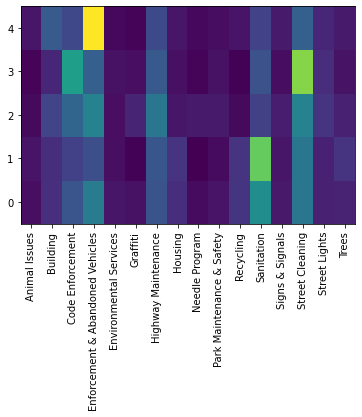

In [76]:
plt.pcolor(df_cluster)
plt.yticks(np.arange(0.5, len(df_cluster.index), 1), df_cluster.index)
plt.xticks(np.arange(0.5, len(df_cluster.columns), 1), df_cluster.columns, rotation='vertical')
plt.show()

In [82]:
df_temp = df_new.sort_values(by=['cluster'])
df_temp

#export zipcode and clusters
compression_opts = dict(method='zip',
                        archive_name='clusters.csv')  
df_temp.to_csv('clusters.zip', index=True,
          compression=compression_opts) 

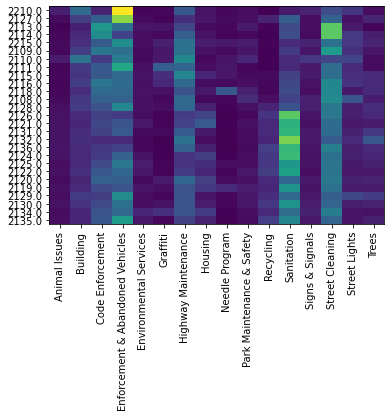

In [80]:
df_temp = df_temp.drop(['cluster'], axis=1)
plt.pcolor(df_temp)
plt.yticks(np.arange(0.5, len(df_temp.index), 1), df_temp.index)
plt.xticks(np.arange(0.5, len(df_temp.columns), 1), df_temp.columns, rotation='vertical')
plt.show()

In [ ]:
<>

In [71]:
labels_scale = kmeans.labels_

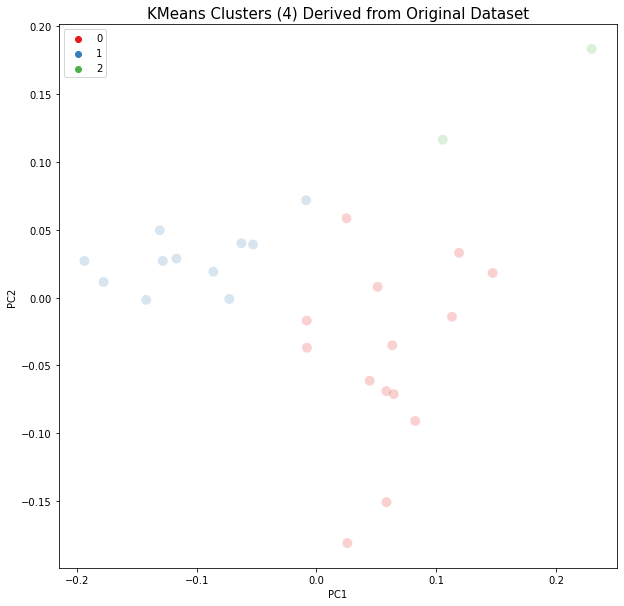

In [75]:
pca2 = PCA(n_components=3).fit(df_new)
pca2d = pca2.transform(df_new)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Useful Links:
https://bostonopendata-boston.opendata.arcgis.com/datasets/53ea466a189b4f43b3dfb7b38fa7f3b6_1